In [2]:
import os#灰度化
import glob
import cv2

def togrey(img,outdir):
    src = cv2.imread(img) 
    try:
        dst = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(outdir,os.path.basename(img)), dst)
    except Exception as e:
        print(e)

for file in glob.glob('C:\\Users\\lpy\\Desktop\\label\\label\\*.png'):  
    togrey(file,'C:\\Users\\lpy\\Desktop\\label\\label\\')

In [6]:
import cv2
img=cv2.imread('C:\\Users\\lpy\\Desktop\\test\\test.png',0)
cv2.imshow('test',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("C:\\Users\\lpy\\Desktop\\test\\test1.png",img)

True

In [3]:
#coding=utf-8
#批量阈值化
import os#
import glob
import cv2

def tothreshold(img,outdir):
    dcm=cv2.imread(img)
    try:
        ret, threshold = cv2.threshold(dcm, 1, 255, cv2.THRESH_BINARY)
        file_name=os.path.basename(img)
        file_name = file_name.split('.')[0]
        file_name+=".png"
        cv2.imwrite(outdir+file_name, threshold)
    except Exception as e:
        print(e)

for file in glob.glob('C:\\Users\\lpy\\Desktop\\label\\label\\*.png'):  
    tothreshold(file,'C:\\Users\\lpy\\Desktop\\label\\label\\')

In [3]:

import numpy as np#RGB化
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
import sys
import shutil


path='I:/unet-master/unet-master/data/membrane/train/label/'   # 要处理的图像所在目录
newpath='I:/unet-master/unet-master/data/membrane/train/label'    # 转换后的图像存储目录

def to24(path):
    files = os.listdir(path)
    files = np.sort(files)
    
    for f in files:
        imgpath = path + f
        img = Image.open(imgpath).convert('RGB')
        # 这里可能会报错 TypeError: Expected Ptr < cv::UMat > for argument '%s'
        # 报错原因是传入的参数不对，原本传入到cv2中的image需要是numpy.array类型，但是从Debug的信息可以看出，传进去的是字符串类型，所以报错。解决方法如下：
        # 这里先把图像转换成numpy数组的格式，然再用imwrite写入，如下：
        img_array = np.array(img)

        # img = Image.open(imgpath)
        dirpath = newpath
        file_name, file_extend = os.path.splitext(f)
        dst = os.path.join(os.path.abspath(dirpath), file_name + '.png')
        # cv2.imwrite(dst, img) 
        # 直接运行上句代码时会报错 TypeError: Expected Ptr < cv::UMat > for argument '%s'，报错原因见上，这里修改为如下代码语句：
        cv2.imwrite(dst, img_array)

to24(path)

In [7]:
#根据格式批量移动文件
import shutil
import os

def move_file(old_path, new_path):
    print(old_path)
    print(new_path)
    filelist = os.listdir(old_path) #列出该目录下的所有文件,listdir返回的文件列表是不包含路径的。
    for file in filelist:
        if file.split(".")[1]=="json":
            src = os.path.join(old_path, file)
            dst = os.path.join(new_path, file)
            print('src:', src)
            print('dst:', dst)
            shutil.move(src, dst)

if __name__ == '__main__':
    move_file(r"H:\LogoPrint\LogoPrint\dashboxAI\label", r"H:\LogoPrint\LogoPrint\dashboxAI\labelYOLO")

H:\LogoPrint\LogoPrint\dashboxAI\label
H:\LogoPrint\LogoPrint\dashboxAI\labelYOLO
src: H:\LogoPrint\LogoPrint\dashboxAI\label\AP001_1.json
dst: H:\LogoPrint\LogoPrint\dashboxAI\labelYOLO\AP001_1.json
src: H:\LogoPrint\LogoPrint\dashboxAI\label\AP002_1.json
dst: H:\LogoPrint\LogoPrint\dashboxAI\labelYOLO\AP002_1.json
src: H:\LogoPrint\LogoPrint\dashboxAI\label\AP003_1.json
dst: H:\LogoPrint\LogoPrint\dashboxAI\labelYOLO\AP003_1.json
src: H:\LogoPrint\LogoPrint\dashboxAI\label\ARCA001_1.json
dst: H:\LogoPrint\LogoPrint\dashboxAI\labelYOLO\ARCA001_1.json
src: H:\LogoPrint\LogoPrint\dashboxAI\label\BB001_1.json
dst: H:\LogoPrint\LogoPrint\dashboxAI\labelYOLO\BB001_1.json
src: H:\LogoPrint\LogoPrint\dashboxAI\label\BB005_1.json
dst: H:\LogoPrint\LogoPrint\dashboxAI\labelYOLO\BB005_1.json
src: H:\LogoPrint\LogoPrint\dashboxAI\label\BB006_1.json
dst: H:\LogoPrint\LogoPrint\dashboxAI\labelYOLO\BB006_1.json
src: H:\LogoPrint\LogoPrint\dashboxAI\label\BBO001_1.json
dst: H:\LogoPrint\LogoPrint\da

In [2]:
import os#批量删除某格式文件

def del_files(path):
  for root , dirs, files in os.walk(path):
    for name in files:
      if name.endswith(".txt"):   #指定要删除的格式，这里是jpg 可以换成其他格式
        os.remove(os.path.join(root, name))
        print ("Delete File: " + os.path.join(root, name))
# test
if __name__ == "__main__":
  path = 'H:\LogoPrint\LogoPrint\dashboxAI\label'
  del_files(path)


Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\AP001_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\AP002_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\AP003_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\ARCA001_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\BB001_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\BB005_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\BB006_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\BBO001_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\BCH001_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\BDL002_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\BDL003_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\classes.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\CP003_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\CP004_1.txt
Delete File: H:\LogoPrint\LogoPrint\dashboxAI\label\CT001_1.txt
Delete File: H:\LogoPrint\LogoPrin

In [1]:
import os#批量删除带有某名字的文件
path="H:\\老照片\\"
files=os.listdir(path)
for i ,f in enumerate(files):
    if f.find("副本")>=0 :
        print(f)
        os.remove(path+f)

IMG20170202111604 - 副本 (2) - 副本.jpg
IMG20170202111604 - 副本 (2).jpg
IMG20170202111604 - 副本 (3).jpg
IMG20170202111604 - 副本 - 副本.jpg
IMG20170202111604 - 副本.jpg
IMG20170202111637 - 副本 (2) - 副本.jpg
IMG20170202111637 - 副本 (2).jpg
IMG20170202111637 - 副本 (3).jpg
IMG20170202111637 - 副本 - 副本.jpg
IMG20170202111637 - 副本.jpg
IMG20170202111713 - 副本 (2) - 副本.jpg
IMG20170202111713 - 副本 (2).jpg
IMG20170202111713 - 副本 (3).jpg
IMG20170202111713 - 副本 - 副本.jpg
IMG20170202111713 - 副本.jpg
IMG20170202111742 - 副本 (2) - 副本.jpg
IMG20170202111742 - 副本 (2).jpg
IMG20170202111742 - 副本 (3).jpg
IMG20170202111742 - 副本 - 副本.jpg
IMG20170202111742 - 副本.jpg
IMG20170202111755 - 副本 (2) - 副本.jpg
IMG20170202111755 - 副本 (2).jpg
IMG20170202111755 - 副本 (3).jpg
IMG20170202111755 - 副本 - 副本.jpg
IMG20170202111755 - 副本.jpg
IMG20170202111804 - 副本 (2) - 副本.jpg
IMG20170202111804 - 副本 (2).jpg
IMG20170202111804 - 副本 (3).jpg
IMG20170202111804 - 副本 - 副本.jpg
IMG20170202111804 - 副本.jpg
IMG20170202111829 - 副本 (2) - 副本.jpg
IMG20170202111829 - 副本

IMG20170202114820 - 副本 (3).jpg
IMG20170202114820 - 副本 - 副本.jpg
IMG20170202114820 - 副本.jpg
IMG20170202114842 - 副本 (2) - 副本.jpg
IMG20170202114842 - 副本 (2).jpg
IMG20170202114842 - 副本 (3).jpg
IMG20170202114842 - 副本 - 副本.jpg
IMG20170202114842 - 副本.jpg
IMG20170202114849 - 副本 (2) - 副本.jpg
IMG20170202114849 - 副本 (2).jpg
IMG20170202114849 - 副本 (3).jpg
IMG20170202114849 - 副本 - 副本.jpg
IMG20170202114849 - 副本.jpg
IMG20170202114906 - 副本 (2) - 副本.jpg
IMG20170202114906 - 副本 (2).jpg
IMG20170202114906 - 副本 (3).jpg
IMG20170202114906 - 副本 - 副本.jpg
IMG20170202114906 - 副本.jpg
IMG20170202114915 - 副本 (2) - 副本.jpg
IMG20170202114915 - 副本 (2).jpg
IMG20170202114915 - 副本 (3).jpg
IMG20170202114915 - 副本 - 副本.jpg
IMG20170202114915 - 副本.jpg
IMG20170202114925 - 副本 (2) - 副本.jpg
IMG20170202114925 - 副本 (2).jpg
IMG20170202114925 - 副本 (3).jpg
IMG20170202114925 - 副本 - 副本.jpg
IMG20170202114925 - 副本.jpg
IMG20170202114928 - 副本 (2) - 副本.jpg
IMG20170202114928 - 副本 (2).jpg
IMG20170202114928 - 副本 (3).jpg
IMG20170202114928 - 副本 - 副本

IMG_20170202_113558 - 副本 (3).jpg
IMG_20170202_113558 - 副本 - 副本.jpg
IMG_20170202_113558 - 副本.jpg
IMG_20170202_113622 - 副本 (2) - 副本.jpg
IMG_20170202_113622 - 副本 (2).jpg
IMG_20170202_113622 - 副本 (3).jpg
IMG_20170202_113622 - 副本 - 副本.jpg
IMG_20170202_113622 - 副本.jpg
IMG_20170202_113649 - 副本 (2) - 副本.jpg
IMG_20170202_113649 - 副本 (2).jpg
IMG_20170202_113649 - 副本 (3).jpg
IMG_20170202_113649 - 副本 - 副本.jpg
IMG_20170202_113649 - 副本.jpg
IMG_20170202_113805 - 副本 (2) - 副本.jpg
IMG_20170202_113805 - 副本 (2).jpg
IMG_20170202_113805 - 副本 (3).jpg
IMG_20170202_113805 - 副本 - 副本.jpg
IMG_20170202_113805 - 副本.jpg
IMG_20170202_113853 - 副本 (2) - 副本.jpg
IMG_20170202_113853 - 副本 (2).jpg
IMG_20170202_113853 - 副本 (3).jpg
IMG_20170202_113853 - 副本 - 副本.jpg
IMG_20170202_113853 - 副本.jpg
IMG_20170202_114008 - 副本 (2) - 副本.jpg
IMG_20170202_114008 - 副本 (2).jpg
IMG_20170202_114008 - 副本 (3).jpg
IMG_20170202_114008 - 副本 - 副本.jpg
IMG_20170202_114008 - 副本.jpg
IMG_20170202_114049 - 副本 (2) - 副本.jpg
IMG_20170202_114049 - 副本 (2).jp

In [5]:
import os#批量重命名
path = 'H:\\LogoPrint\\LogoPrint\\pictures\\bag\\'
num= 0
for file in os.listdir(path):
    os.rename(os.path.join(path,file),os.path.join(path,str(num)+".png"))
    num+=1

In [16]:
import os#批量重命名
path = 'H:\LogoPrint\LogoPrint\clipImage/'
for file in os.listdir(path):
    name=file.split('.')[0]
    os.rename(os.path.join(path,file),os.path.join(path,name+".png"))

In [2]:
#批量缩放
import os
from PIL import Image
 
filename = os.listdir("C:\\Users\\lpy\\Desktop\\label\\label\\")
base_dir = "C:\\Users\\lpy\\Desktop\\label\\label\\"
new_dir  = "C:\\Users\\lpy\\Desktop\\label\\label1500x1000\\"
size_m = 1500
size_n = 1000
 
for img in filename:
    image = Image.open(base_dir + img)
    image_size = image.resize((size_m, size_n),Image.ANTIALIAS)
    image_size.save(new_dir+ img)

In [9]:
#TTA前后对比
from cv2 import cv2
import numpy as np
import os
ttapath='I:\\ictnet\\data\\test\\results\\36\\final\\'
oripath='I:\\ictnet\\data\\test\\results\\35\\final\\'
resultpath='I:\\difference\\'
ttafile = os.listdir(ttapath)
orifile = os.listdir(oripath)
for i in range(len(ttafile)):
    original=np.array(cv2.imread(os.path.join(oripath,orifile[i])))
    merge=np.array(cv2.imread(os.path.join(ttapath,ttafile[i])))
    result=merge-original
    cv2.imwrite(resultpath+orifile[i],result)

143


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


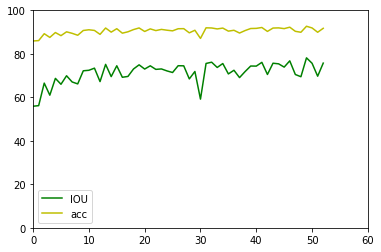

In [2]:
#数据可视化绘图
import matplotlib.pyplot as plt
import codecs
import numpy as np
f = codecs.open('I:\\ictnet\\data\\test\\iouacc1.txt', mode='r', encoding='utf-8')  # 打开txt文件，以‘utf-8’编码读取
line = f.readline()   # 以行的形式进行读取文件
ious = []
accs = []
while line:
    a = line.split()
    iou = a[0:1]   # 这是选取需要读取的位数
    iou=float(iou[0])
    ious.append(iou)  # 将其添加在列表之中
    acc=a[1:2]
    acc=float(acc[0])
    accs.append(acc)
    line = f.readline()
    line = f.readline()
f.close()


fig = plt.figure()
plt.axis([0, 60, 0, 100])
ax = fig.add_subplot(1,1,1)
ax.plot(ious, 'g-', label='IOU')
ax.plot(accs, 'y-', label='acc')

plt.legend()

In [3]:
f = open('I:\\ictnet\\data\\test\\eval.txt','r')
lines = f.readlines()
for lines in lines:
    if "Overall" in lines:
        print(lines)

Overall		55.91%	85.92%

Overall		56.18%	86.09%

Overall		66.54%	89.26%

Overall		60.99%	87.56%

Overall		68.72%	89.8%

Overall		66.01%	88.37%

Overall		69.92%	90.13%

Overall		67.07%	89.44%

Overall		66.18%	88.55%

Overall		72.21%	90.75%

Overall		72.44%	91.07%

Overall		73.42%	90.77%

Overall		67.24%	88.96%

Overall		75.16%	91.88%

Overall		69.54%	89.99%

Overall		74.51%	91.56%

Overall		69.23%	89.51%

Overall		69.61%	90.14%

Overall		73.04%	91.16%

Overall		74.95%	91.91%

Overall		73.01%	90.29%

Overall		74.5%	91.48%

Overall		72.86%	90.7%

Overall		73.06%	91.24%

Overall		72.15%	90.87%

Overall		71.42%	90.58%

Overall		74.54%	91.55%

Overall		74.49%	91.59%

Overall		68.47%	89.66%

Overall		71.89%	90.85%

Overall		59.18%	87.1%

Overall		75.58%	91.97%

Overall		76.16%	91.9%

Overall		73.74%	91.46%

Overall		75.54%	91.85%

Overall		70.77%	90.45%

Overall		72.45%	90.84%

Overall		69.08%	89.57%

Overall		71.86%	90.71%

Overall		74.4%	91.65%

Overall		74.36%	91.72%

Overall		76.09%	92.12%

In [32]:
with open('I:\\ictnet\\data\\test\\iouacc1.txt', 'r') as fpr:
    content = fpr.read()
content = content.replace('%', '')
print(content)
with open('I:\\ictnet\\data\\test\\iouacc1.txt', 'w') as fpw:
    fpw.write(content)

		55.91	85.92

		56.18	86.09

		66.54	89.26

		60.99	87.56

		68.72	89.8

		66.01	88.37

		69.92	90.13

		67.07	89.44

		66.18	88.55

		72.21	90.75

		72.44	91.07

		73.42	90.77

		67.24	88.96

		75.16	91.88

		69.54	89.99

		74.51	91.56

		69.23	89.51

		69.61	90.14

		73.04	91.16

		74.95	91.91

		73.01	90.29

		74.5	91.48

		72.86	90.7

		73.06	91.24

		72.15	90.87

		71.42	90.58

		74.54	91.55

		74.49	91.59

		68.47	89.66

		71.89	90.85

		59.18	87.1

		75.58	91.97

		76.16	91.9

		73.74	91.46

		75.54	91.85

		70.77	90.45

		72.45	90.84

		69.08	89.57

		71.86	90.71

		74.4	91.65

		74.36	91.72

		76.09	92.12

		70.52	90.32

		75.69	91.86

		75.41	91.94

		73.9	91.6

		76.78	92.26

		70.5	90.36

		69.48	89.93

		78.16	92.69

		75.66	91.91

		69.72	89.93

		75.74	91.75



In [13]:
#左上角x，y，右下角x，y
#图像截取
import os
import numpy as np
import cv2
path="H:\LogoPrint\LogoPrint\extractImage/"
newpath="H:\LogoPrint\LogoPrint\clipImage/"
files = os.listdir(path)
for f in files:
    imgpath = path + f
    image = cv2.imread(imgpath)  
    cropImg = image[0:3380,1360:5052] #顺序： 左上角y，右下角y，左上角x，右下角x
    
    file_name, file_extend = os.path.splitext(f)
    dst = os.path.join(os.path.abspath(newpath), file_name + '.png')
    img_array = np.array(cropImg)
    
    cv2.imwrite(dst, img_array)
# print pth



In [13]:
#pdf转图片
import datetime
# PyMuPDF=1.21.1
import fitz
import os 

def pdf2img(pdf_path, img_path):
    for file in os.listdir(pdf_path):
        pdfDoc = fitz.open(os.path.join(pdf_path,file))
        for page in pdfDoc.pages():
            # 将页面转换为图片
            rotate = int(0)
            # 每个尺寸的缩放系数为1.3，这将为我们生成分辨率提高2.6的图像。
            # 此处若是不做设置，默认图片大小为：792X612, dpi=72
            # pix = page.get_pixmap()
            zoom_x = 6
            zoom_y = 6
            # (1.33333333-->1056x816)   (2-->1584x1224)  (3-->3572x2526)
            # x和y的值越大越清晰，图片越大，但处理也越耗时间，这里取决于你想要图片的清晰度
            # 默认为1.333333，一般日常使用3就够了，不能设置太大，太大容易使电脑死机
            mat = fitz.Matrix(zoom_x, zoom_y)
            pix = page.get_pixmap(matrix=mat, dpi=None, colorspace='rgb', alpha=False)
#             imageName = pdf_path.split("\\")[len(pdf_path.split("\\"))-1]
            target_img_name = img_path + '\\%s.png' % file #构造图片名字
            # 保存图片
            pix.save(target_img_name)


if __name__ == '__main__':
    startTime_pdf2img = datetime.datetime.now()  # 开始时间
    pdf_path = "H:\LogoPrint\LogoPrint\Full Range - PDF Line Drawings"
    img_path = "H:\LogoPrint\LogoPrint\extractImage"
 
    pdf2img(pdf_path, img_path)
 
    endTime_pdf2img = datetime.datetime.now()  # 结束时间
    print('===========END==========')
    print('PDF转换图片累计耗时：【%s秒】' % (endTime_pdf2img - startTime_pdf2img).seconds)

17.png


In [ ]:
#提取pdf中的图片
import os
import fitz
from os.path import abspath, dirname

#使用fitz 库直接提取pdf的图像
#参数：    pdf      源pdf文件完整路径
#参数：    picPath  提取图像的路径
def muExtractImages(pdf,picPath):
    pdfsplit = os.path.split(pdf)   #分离出文件名和路径
    pdfname = pdfsplit[-1]  #获取文件名
    pdfsplit1 = os.path.splitext(pdfname)
    pdfname1 = pdfsplit1[0]   #获取不带扩展名的文件名
    
    #print(pdfsplit)
    #print(pdfname)
    #print(pdfname1)
    # 打开pdf，打印PDF的相关信息
    doc = fitz.open(pdf)
    # 图片计数
    imgcount = 0
    lenXREF = doc.xref_length()    #获取pdf文件对象总数

    # 打印PDF的信息
    print("文件名:{}, 页数: {}, 对象: {}".format(pdf, len(doc), lenXREF - 1))
    
    #遍历doc，获取每一页
    for page in doc: 
        try:
            imgcount +=1
            tupleImage = page.get_images()
            lstImage = list(tupleImage)           
            xref0 = lstImage[0]    #取第一个元组
            xref1 = list(xref0)     #元组转化为列表            
            xref = xref1[0]   #最终取得xref  ok
            print("imgID:    %s" % imgcount)    
            print("xref:  %s" % xref)
            img = doc.extract_image(xref)   #获取文件扩展名，图片内容 等信息
            imageFilename = ("%s-%s." % (imgcount, xref) + img["ext"])
            imageFilename = pdfname1 + "_" + imageFilename  #合成最终 的图像的文件名
            imageFilename = os.path.join(picPath, imageFilename)   #合成最终图像完整路径名
            print(imageFilename)
            imgout = open(imageFilename, 'wb')   #byte方式新建图片
            imgout.write(img["image"])   #当前提取的图片写入磁盘
            imgout.close
        except:
            continue
    
    
if __name__ == '__main__':
#     current_path = abspath(dirname(__file__))    #获取当前目录
    pdf = os.path.join('G:\学习文件','个人工作报告.pdf')
    print(pdf)
    muExtractImages(pdf, "H:\LogoPrint\LogoPrint\extractImage")